## Let's Draw a 2-class Precision-Recall curve without the help of sklearn
* We better to write our own code to plot Precision-Recall curve, in order to learn the concept of Precision and Recall. 
1. First, we do a simulation and get a series of predicted values (discrete floats).
2. Compare predicted values against a self-specified threshold so we know the True or False result.
3. We can plot a curve along the varying threshold value. 

### Prepare a dataset

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X[y < 2], y[y < 2], test_size=0.5, random_state=random_state
)

### Train a model 

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(random_state=RandomState(MT19937) at 0x7F98596E3640))])

### Do a prediction on test data

In [3]:
y_score = classifier.decision_function(X_test)

### See what the predicted values on test data are and what the target values are

In [4]:
print('Predicted values:', y_score)
print('Target values:', y_test)

Predicted values: [-0.21736253  0.28300038  0.13879677  0.25557895  0.32631246 -0.2198405
 -0.22550512 -0.32917314  0.1449939  -0.35314629 -0.11165123 -0.2114602
 -0.23500545  0.06758177  0.14505398 -0.23934034  0.10577297  0.02331338
 -0.09398889 -0.36296952  0.30076248 -0.25183848 -0.5935314   0.28837567
  0.03077492 -0.129376    0.4713946   0.39266782 -0.63225961 -0.49417368
 -0.1533131   0.01370612 -0.49182613  0.26367214 -0.15586916  0.08190372
 -0.08637947 -0.25401514 -0.09055313 -0.43912955  0.0590284   0.04677897
 -0.04442745  0.46748089 -0.40801764  0.29314473  0.22743277 -0.06617729
 -0.00353831  0.00895841]
Target values: [1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 0]


### OK, let's see what Precision rate and Recall rate are if the threshold is 0.1

In [5]:
thres = 0.1
predicted = [1 if i > thres else 0 for i in y_score]   
Tp = [ 1 if i==1 and j==1 else 0 for i, j in zip(y_test, predicted)] 
Fp = [ 1 if i==0 and j==1 else 0 for i, j in zip(y_test, predicted)] 
Fn = [ 1 if i==1 and j==0 else 0 for i, j in zip(y_test, predicted)] 
#print(Tp)
P = sum(Tp) / (sum(Tp) + sum(Fp))
R = sum(Tp) / (sum(Tp) + sum(Fn))
print(f'{{ "P":{P:.3f}, "R":{R:.3f} }}')

{ "P":0.933, "R":0.538 }


### Let's vary the threshold between maximum and minimum y_score and plot the curve

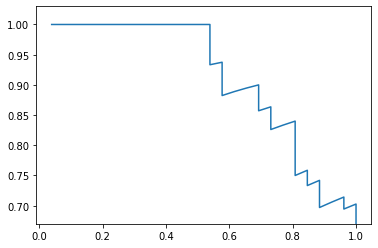

In [6]:
import matplotlib.pyplot as plt
x = []
y = []
pts = 1000 # We want 1000 point in the curve
step = (max(y_score)-min(y_score))/pts
mini = min(y_score)
for i in range(pts):
    thres = mini + step * i  
    predicted = [1 if i > thres else 0 for i in y_score]  
    #print(predicted)
    #print(y_test)
    Tp = [ 1 if i==1 and j==1 else 0 for i, j in zip(y_test, predicted)] 
    Fp = [ 1 if i==0 and j==1 else 0 for i, j in zip(y_test, predicted)] 
    Fn = [ 1 if i==1 and j==0 else 0 for i, j in zip(y_test, predicted)] 
    #print(Tp)
    P = sum(Tp) / (sum(Tp) + sum(Fp))
    R = sum(Tp) / (sum(Tp) + sum(Fn))
    x.append(R)
    y.append(P) 
plt.ylim(0.67, 1.03)
plt.plot(x,y)

### See what if we use stock function

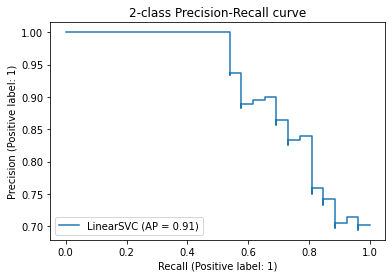

In [7]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

 ### Precision-Recall Metric
 * 用于评价classifier
 * Precision 评估假阳性(假当真)跟真阳性的比率 P = Tp/(Tp+Fp)，Recall评估假阴性(真当假)跟真阳性的比率 R = Tp/(Tp+Fn).
 * 高Precision意味着低假阳性，但可能因为与之过高把针阳性的都被当阴性了，这就导致大量出现假阴性，换句话说，牺牲阳性结果，让假阳性变少，如果出现这种情况，则Recall变低。
 * 最好是高Precision的同时，被判为阴性的例子真的都是阴性，不出现假阴性。 